<a href="https://colab.research.google.com/github/juliatessler/datascience4health-2021/blob/main/NHANES%20-%20Demographic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os dados estão no nosso drive. Aqui, você deve clicar no link depois de rodar a célula, copiar o código que a nova página vai te dar e colar aqui.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading data

In [ ]:
!pip install fast_ml

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from fast_ml.model_development import train_valid_test_split
from matplotlib.colors import TwoSlopeNorm
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
prefix = '/content/drive/MyDrive/Ciência de Dados e Saúde/Databases/NHANES/'

### 2005 - 2006

In [ ]:
demo4 = pd.read_sas(prefix+'2005-2006/DEMO_D.XPT')

demo4.rename(columns = {
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDEXMON': 'Six-month time period',
    'RIDAGEEX': 'Age in months at exam - 0 to 19 years',
    'DMQMILIT': 'Served active duty in US Armed Forces',
    'DMDBORN2': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHRGND': 'HH ref persons gender',
    'DMDHRAGE': 'HH ref persons age in years',
    'DMDHRBR2': 'HH ref persons country of birth',
    'DMDHREDU': 'HH ref persons education level',
    'DMDHRMAR': 'HH ref persons marital status',
    'DMDHSEDU': 'HH ref persons spouses education level',
    'DMDSCHOL': 'Now attending school?'
    },
    inplace = True
)

demo4['years'] = '2007-2008'

In [ ]:
demo4.head()

,SEQN,Data release cycle,Interview/Examination status,Six-month time period,Gender,Age in years at screening,Age in months at screening - 0 to 24,Age in months at exam - 0 to 19 years,Race/Hispanic origin,Served active duty in US Armed Forces,DMDBORN,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,INDHHINC,INDFMINC,Ratio of family income to poverty,Pregnancy status at exam,HH ref persons gender,HH ref persons age in years,DMDHRBRN,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,AIALANG,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,years
0,31127.0,4.0,2.0,2.0,1.0,5.397605e-79,11.0,12.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,0.75,NaN,2.0,21.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2.0,44.0,2007-2008
1,31128.0,4.0,2.0,1.0,2.0,1.100000e+01,132.0,132.0,4.0,NaN,1.0,1.0,NaN,4.0,NaN,1.0,NaN,7.0,6.0,8.0,5.0,0.77,2.0,1.0,47.0,1.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1.0,52.0,2007-2008
2,31129.0,4.0,2.0,2.0,1.0,1.500000e+01,189.0,190.0,4.0,NaN,1.0,1.0,NaN,10.0,NaN,1.0,5.0,6.0,6.0,10.0,10.0,2.71,NaN,1.0,41.0,1.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1.0,51.0,2007-2008
3,31130.0,4.0,2.0,2.0,2.0,8.500000e+01,NaN,NaN,3.0,2.0,1.0,1.0,NaN,NaN,4.0,NaN,2.0,1.0,1.0,4.0,4.0,1.99,NaN,2.0,85.0,1.0,4.0,2.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2.0,46.0,2007-2008
4,31131.0,4.0,2.0,2.0,2.0,4.400000e+01,535.0,536.0,4.0,2.0,1.0,1.0,NaN,NaN,4.0,NaN,1.0,4.0,4.0,11.0,11.0,4.65,2.0,1.0,36.0,1.0,5.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1.0,48.0,2007-2008


### 2007 - 2008

In [ ]:
demo5 = pd.read_sas(prefix+'2007-2008/DEMO_E.XPT')

demo5.rename(columns = {
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDEXMON': 'Six-month time period',
    'RIDAGEEX': 'Age in months at exam - 0 to 19 years',
    'DMQMILIT': 'Served active duty in US Armed Forces',
    'DMDBORN2': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHRGND': 'HH ref persons gender',
    'DMDHRAGE': 'HH ref persons age in years',
    'DMDHRBR2': 'HH ref persons country of birth',
    'DMDHREDU': 'HH ref persons education level',
    'DMDHRMAR': 'HH ref persons marital status',
    'DMDHSEDU': 'HH ref persons spouses education level',
    'DMDSCHOL': 'Now attending school?'
    },
    inplace = True
)

demo5['years'] = '2007-2008'

In [ ]:
demo5.head()

,SEQN,Data release cycle,Interview/Examination status,Six-month time period,Gender,Age in years at screening,Age in months at screening - 0 to 24,Age in months at exam - 0 to 19 years,Race/Hispanic origin,Served active duty in US Armed Forces,Country of birth,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,Annual household income,Annual family income,Ratio of family income to poverty,Pregnancy status at exam,HH ref persons gender,HH ref persons age in years,HH ref persons country of birth,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,AIALANG,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,years
0,41475.0,5.0,2.0,2.0,2.0,62.0,751.0,752.0,5.0,2.0,1.0,1.0,NaN,NaN,3.0,NaN,1.0,2.0,2.0,6.0,6.0,1.83,NaN,1.0,64.0,1.0,4.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,59356.356426,60045.772497,1.0,60.0,2007-2008
1,41476.0,5.0,2.0,1.0,2.0,6.0,81.0,82.0,5.0,NaN,1.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,6.0,6.0,15.0,15.0,5.00,NaN,1.0,51.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,35057.218405,35353.210440,1.0,70.0,2007-2008
2,41477.0,5.0,2.0,2.0,1.0,71.0,859.0,860.0,3.0,1.0,1.0,1.0,NaN,NaN,3.0,NaN,1.0,2.0,2.0,5.0,5.0,1.50,NaN,1.0,71.0,1.0,3.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,9935.266183,10074.150074,1.0,67.0,2007-2008
3,41478.0,5.0,2.0,2.0,2.0,1.0,17.0,17.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,3.0,0.66,NaN,2.0,25.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,12846.712058,14560.472652,2.0,59.0,2007-2008
4,41479.0,5.0,2.0,1.0,1.0,52.0,629.0,630.0,1.0,2.0,2.0,1.0,6.0,NaN,1.0,NaN,1.0,5.0,5.0,8.0,8.0,2.20,NaN,1.0,52.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,8727.797555,9234.055759,1.0,70.0,2007-2008


### 2009 - 2010

In [ ]:
demo6 = pd.read_sas(prefix+'2009-2010/DEMO_F.XPT')

demo6.rename(columns = {
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDEXMON': 'Six-month time period',
    'RIDAGEEX': 'Age in months at exam - 0 to 19 years',
    'DMQMILIT': 'Served active duty in US Armed Forces',
    'DMDBORN2': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHRGND': 'HH ref persons gender',
    'DMDHRAGE': 'HH ref persons age in years',
    'DMDHRBR2': 'HH ref persons country of birth',
    'DMDHREDU': 'HH ref persons education level',
    'DMDHRMAR': 'HH ref persons marital status',
    'DMDHSEDU': 'HH ref persons spouses education level',
    'DMDSCHOL': 'Now attending school?'
    },
    inplace = True
)

demo6['years'] = '2009-2010'

In [ ]:
demo6.head()

,SEQN,Data release cycle,Interview/Examination status,Six-month time period,Gender,Age in years at screening,Age in months at screening - 0 to 24,Age in months at exam - 0 to 19 years,Race/Hispanic origin,Served active duty in US Armed Forces,Country of birth,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,Annual household income,Annual family income,Ratio of family income to poverty,Pregnancy status at exam,HH ref persons gender,HH ref persons age in years,HH ref persons country of birth,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,AIALANG,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,years
0,51624.0,6.0,2.0,1.0,1.0,34.0,409.0,410.0,3.0,2.0,1.0,1.0,NaN,NaN,3.0,NaN,1.0,4.0,4.0,6.0,6.0,1.36,NaN,1.0,34.0,1.0,3.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,80100.543512,81528.772006,1.0,83.0,2009-2010
1,51625.0,6.0,2.0,2.0,1.0,4.0,49.0,50.0,5.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,5.0,5.0,1.07,NaN,1.0,38.0,5.0,5.0,1.0,5.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,53901.104285,56995.035425,2.0,79.0,2009-2010
2,51626.0,6.0,2.0,1.0,1.0,16.0,202.0,202.0,4.0,NaN,1.0,1.0,NaN,8.0,NaN,1.0,NaN,4.0,4.0,8.0,8.0,2.27,NaN,1.0,47.0,1.0,1.0,77.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,13953.078343,14509.278860,1.0,84.0,2009-2010
3,51627.0,6.0,2.0,1.0,1.0,10.0,131.0,132.0,4.0,NaN,1.0,1.0,NaN,4.0,NaN,1.0,NaN,6.0,6.0,5.0,5.0,0.81,NaN,1.0,53.0,1.0,3.0,6.0,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,11664.899398,12041.635365,2.0,86.0,2009-2010
4,51628.0,6.0,2.0,2.0,2.0,60.0,722.0,722.0,4.0,2.0,1.0,1.0,NaN,NaN,3.0,NaN,2.0,2.0,2.0,3.0,3.0,0.69,NaN,2.0,60.0,1.0,3.0,2.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,20090.339256,21000.338724,2.0,75.0,2009-2010


### 2011 - 2012

In [ ]:
demo7 = pd.read_sas(prefix+'2011-2012/DEMO_G.XPT')

demo7.rename(columns = {
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six-month time period',
    'RIDEXAGY': 'Age in years at exam - 2 to 19 years',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMQADFC': 'Served in a foreign country',
    'DMDBORN4': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHHSZA': '# of children 5 years or younger in HH',
    'DMDHHSZB': '# of children 6-17 years old in HH',
    'DMDHHSZE': '# of adults 60 years or older in HH',
    'DMDHRGND': 'HH ref persons gender',
    'DMDHRAGE': 'HH ref persons age in years',
    'DMDHRBR4': 'HH ref persons country of birth',
    'DMDHREDU': 'HH ref persons education level',
    'DMDHRMAR': 'HH ref persons marital status',
    'DMDHSEDU': 'HH ref persons spouses education level'
    },
    inplace = True
)

demo7['years'] = '2011-2012'

In [ ]:
demo7.head()

,SEQN,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in years at exam - 2 to 19 years,Age in months at exam - 0 to 19 years,Served active duty in US Armed Forces,Served in a foreign country,Country of birth,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Marital status,Pregnancy status at exam,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,Language of ACASI Interview,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Annual household income,Annual family income,Ratio of family income to poverty,Total number of people in the Household,Total number of people in the Family,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH,HH ref persons gender,HH ref persons age in years,HH ref persons country of birth,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,years
0,62161.0,7.0,2.0,1.0,22.0,NaN,3.0,3.0,2.0,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,3.0,5.0,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,102641.406474,104236.582554,1.0,91.0,14.0,14.0,3.15,5.0,5.0,5.397605e-79,1.0,5.397605e-79,2.0,50.0,1.0,5.0,1.0,5.0,2011-2012
1,62162.0,7.0,2.0,2.0,3.0,NaN,1.0,1.0,1.0,3.0,41.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,15457.736897,16116.354010,3.0,92.0,4.0,4.0,0.60,6.0,6.0,2.000000e+00,2.0,5.397605e-79,2.0,24.0,1.0,3.0,6.0,NaN,2011-2012
2,62163.0,7.0,2.0,1.0,14.0,NaN,5.0,6.0,2.0,14.0,177.0,NaN,NaN,1.0,1.0,NaN,8.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7397.684828,7869.485117,3.0,90.0,15.0,15.0,4.07,5.0,5.0,5.397605e-79,2.0,1.000000e+00,1.0,42.0,1.0,5.0,1.0,4.0,2011-2012
3,62164.0,7.0,2.0,2.0,44.0,NaN,3.0,3.0,1.0,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,4.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,127351.373299,127965.226204,1.0,94.0,8.0,8.0,1.67,5.0,5.0,1.000000e+00,2.0,5.397605e-79,1.0,52.0,1.0,4.0,1.0,4.0,2011-2012
4,62165.0,7.0,2.0,2.0,14.0,NaN,4.0,4.0,2.0,14.0,179.0,NaN,NaN,1.0,1.0,NaN,7.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,12209.744980,13384.042162,2.0,90.0,4.0,4.0,0.57,5.0,5.0,1.000000e+00,2.0,5.397605e-79,2.0,33.0,2.0,2.0,77.0,NaN,2011-2012


### 2015 - 2016

In [ ]:
demo8 = pd.read_sas(prefix+'2015-2016/DEMO_I.XPT')

demo8.rename(columns = {
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six-month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMQADFC': 'Served in a foreign country',
    'DMDBORN4': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Length of time in US',
    'DMDEDUC3': 'Education level - Children/Youth 6-19',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTL': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'SIALANG': 'Language of SP Interview',
    'SIAPROXY': 'Proxy used in SP Interview?',
    'SIAINTRP': 'Interpreter used in SP Interview?',
    'FIALANG': 'Language of Family Interview',
    'FIAPROXY': 'Proxy used in Family Interview?',
    'FIAINTRP': 'Interpreter used in Family Interview?',
    'MIALANG': 'Language of MEC Interview',
    'MIAPROXY': 'Proxy used in MEC Interview?',
    'MIAINTRP': 'Interpreter used in MEC Interview?',
    'AIALANGA': 'Language of ACASI Interview',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDFMSIZ': 'Total number of people in the Family',
    'DMDHHSZA': '# of children 5 years or younger in HH',
    'DMDHHSZB': '# of children 6-17 years old in HH',
    'DMDHHSZE': '# of adults 60 years or older in HH',
    'DMDHRGND': 'HH ref persons gender',
    'DMDHRAGE': 'HH ref persons age in years',
    'DMDHRBR4': 'HH ref persons country of birth',
    'DMDHREDU': 'HH ref persons education level',
    'DMDHRMAR': 'HH ref persons marital status',
    'DMDHSEDU': 'HH ref persons spouses education level',
    'WTINT2YR': 'Full sample 2 year interview weight',
    'WTMEC2YR': 'Full sample 2 year MEC exam weight',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'INDHHIN2': 'Annual household income',
    'INDFMIN2': 'Annual family income',
    'INDFMPIR': 'Ratio of family income to poverty'
    },
    inplace = True
)

demo8['years'] = '2015-2016'

In [ ]:
demo8.head()

,SEQN,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,Served active duty in US Armed Forces,Served in a foreign country,Country of birth,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Marital status,Pregnancy status at exam,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,Language of ACASI Interview,Total number of people in the Household,Total number of people in the Family,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH,HH ref persons gender,HH ref persons age in years,HH ref persons country of birth,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Annual household income,Annual family income,Ratio of family income to poverty,years
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,62.0,1.0,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39,2015-2016
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,2.0,2.0,7.0,NaN,3.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,53.0,2.0,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32,2015-2016
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,1.0,2.0,1.0,1.0,NaN,NaN,3.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,5.397605e-79,5.397605e-79,2.000000e+00,2.0,79.0,1.0,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51,2015-2016
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,6.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,56.0,1.0,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00,2015-2016
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,4.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,2.000000e+00,5.397605e-79,2.0,42.0,1.0,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23,2015-2016


### Appending dataframes into a single one

In [ ]:
demo = (
    demo4.append(demo5)
          .append(demo6)
          .append(demo7)
          .append(demo8)
       )

demo = demo.drop_duplicates()

In [ ]:
demo.head()

,SEQN,Data release cycle,Interview/Examination status,Six-month time period,Gender,Age in years at screening,Age in months at screening - 0 to 24,Age in months at exam - 0 to 19 years,Race/Hispanic origin,Served active duty in US Armed Forces,DMDBORN,Citizenship status,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,INDHHINC,INDFMINC,Ratio of family income to poverty,Pregnancy status at exam,HH ref persons gender,HH ref persons age in years,DMDHRBRN,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,AIALANG,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,years,Country of birth,Annual household income,Annual family income,HH ref persons country of birth,Race/Hispanic origin w/ NH Asian,Age in years at exam - 2 to 19 years,Served in a foreign country,Language of ACASI Interview,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH
0,31127.0,4.0,2.0,2.0,1.0,5.397605e-79,11.0,12.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,0.75,NaN,2.0,21.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2.0,44.0,2007-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128.0,4.0,2.0,1.0,2.0,1.100000e+01,132.0,132.0,4.0,NaN,1.0,1.0,NaN,4.0,NaN,1.0,NaN,7.0,6.0,8.0,5.0,0.77,2.0,1.0,47.0,1.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1.0,52.0,2007-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31129.0,4.0,2.0,2.0,1.0,1.500000e+01,189.0,190.0,4.0,NaN,1.0,1.0,NaN,10.0,NaN,1.0,5.0,6.0,6.0,10.0,10.0,2.71,NaN,1.0,41.0,1.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1.0,51.0,2007-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31130.0,4.0,2.0,2.0,2.0,8.500000e+01,NaN,NaN,3.0,2.0,1.0,1.0,NaN,NaN,4.0,NaN,2.0,1.0,1.0,4.0,4.0,1.99,NaN,2.0,85.0,1.0,4.0,2.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2.0,46.0,2007-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,4.0,2.0,2.0,2.0,4.400000e+01,535.0,536.0,4.0,2.0,1.0,1.0,NaN,NaN,4.0,NaN,1.0,4.0,4.0,11.0,11.0,4.65,2.0,1.0,36.0,1.0,5.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1.0,48.0,2007-2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retrieving hearing dataframes created previously

In [ ]:
df_left = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Saúde/Databases/left_clean.csv')
df_left.head()

,Unnamed: 0,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Please give me the total number of moths or years for all jobs where this has happened,Left @ 500Hz in decibels (Hearing Level),Left @ 1000Hz in decibels (Hearing Level),Left @ 2000Hz in decibels (Hearing Level),Left @ 4000Hz in decibels (Hearing Level),Left Ear - Quadritonal Mean Value,Left - Hearing Loss Class,LeftHearing Loss Class
0,0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.000000e+00,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.000000e+00,5.000000e+00,1.000000e+01,2.50,NaN,Normal
1,2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,3.000000e+01,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,2.000000e+01,1.000000e+01,3.000000e+01,6.500000e+01,31.25,NaN,Leve
2,3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.000000e+00,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,1.000000e+01,5.397605e-79,-5.000000e+00,5.397605e-79,1.25,NaN,Normal
3,4,7,31134.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.0,1.500000e+01,15.0,9.500000e+01,1.000000e+02,5.000000e+00,5.000000e+00,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.000000e+00,1.500000e+01,9.500000e+01,30.00,NaN,Leve
4,7,14,31141.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,-5.0,5.397605e-79,-5.0,5.397605e-79,5.000000e+00,5.397605e-79,5.397605e-79,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.000000e+00,5.397605e-79,5.397605e-79,-1.25,NaN,Normal


In [ ]:
df_right = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Saúde/Databases/right_clean.csv')
df_right.head()

,Unnamed: 0,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Please give me the total number of moths or years for all jobs where this has happened,Right @ 500Hz in decibels (Hearing Level),Right @ 1000Hz in decibels (Hearing Level),Right @ 2000Hz in decibels (Hearing Level),Right @ 4000Hz in decibels (Hearing Level),Right Ear - Quadritonal Mean Value,Right - Hearing Loss Class,RightHearing Loss Class
0,0,2,31129.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,15.0,5.000000e+00,5.0,1.000000e+01,5.000000e+00,5.397605e-79,1.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,5.0,5.000000e+00,8.75,NaN,Normal
1,2,5,31132.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,15.0,3.000000e+01,20.0,6.500000e+01,1.000000e+02,2.000000e+01,2.000000e+01,1.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,2.000000e+01,15.0,20.0,1.000000e+02,38.75,NaN,Moderada
2,3,6,31133.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.000000e+00,-5.0,5.397605e-79,5.397605e-79,1.000000e+01,5.397605e-79,2.0,1.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.0,5.397605e-79,-2.50,NaN,Normal
3,7,14,31141.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000e+00,-5.0,5.397605e-79,-5.0,5.397605e-79,5.000000e+00,5.397605e-79,5.397605e-79,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,5.397605e-79,-5.0,-5.0,5.000000e+00,-1.25,NaN,Normal
4,8,16,31143.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.0,5.397605e-79,10.0,5.000000e+00,5.397605e-79,1.500000e+01,2.000000e+01,2.0,2.0,2005-2006,NaN,NaN,NaN,NaN,NaN,2.000000e+01,5.0,10.0,5.397605e-79,8.75,NaN,Normal


## Join demographic data with audiometry data

In [ ]:
left = df_left.merge(demo,
                     on = ['SEQN', 'years'])

In [ ]:
left.head()

,Unnamed: 0,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Please give me the total number of moths or years for all jobs where this has happened,Left @ 500Hz in decibels (Hearing Level),Left @ 1000Hz in decibels (Hearing Level),Left @ 2000Hz in decibels (Hearing Level),Left @ 4000Hz in decibels (Hearing Level),Left Ear - Quadritonal Mean Value,...,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,INDHHINC,INDFMINC,Ratio of family income to poverty,Pregnancy status at exam,HH ref persons gender,HH ref persons age in years,DMDHRBRN,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,AIALANG,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Country of birth,Annual household income,Annual family income,HH ref persons country of birth,Race/Hispanic origin w/ NH Asian,Age in years at exam - 2 to 19 years,Served in a foreign country,Language of ACASI Interview,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH
0,3034,24,41499.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,21.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.397605e-79,5.397605e-79,5.397605e-79,5.0,5.397605e-79,15.0,10.0,2.0,2.0,2007-2008,NaN,NaN,NaN,NaN,NaN,15.0,5.0,5.397605e-79,5.0,6.25,...,NaN,1.0,NaN,4.0,4.0,NaN,NaN,1.65,NaN,1.0,48.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,15223.835882,15688.657597,2.0,72.0,1.0,7.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3035,25,41500.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.000000e+01,1.000000e+01,1.000000e+01,30.0,1.000000e+01,10.0,5.0,2.0,2.0,2007-2008,NaN,NaN,NaN,NaN,NaN,10.0,10.0,1.000000e+01,30.0,15.00,...,NaN,1.0,NaN,3.0,3.0,NaN,NaN,1.36,NaN,2.0,48.0,NaN,1.0,4.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,13777.954114,14037.172724,2.0,71.0,2.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3036,28,41503.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.000000e+00,1.500000e+01,1.500000e+01,35.0,4.000000e+01,15.0,10.0,2.0,1.0,2007-2008,NaN,NaN,NaN,NaN,NaN,15.0,10.0,1.500000e+01,35.0,18.75,...,NaN,2.0,NaN,7.0,7.0

In [ ]:
right = df_right.merge(demo,
                       on = ['SEQN', 'years'])

In [ ]:
right.head()

,Unnamed: 0,index,SEQN,"Tympanometry-Right Ear, Measurement 84","Tympanometry- Left Ear, Measurement 84",Comment code for an Audio Exam,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,Normal: Left Ear Otoscopy,Normal: Right Ear Otoscopy,Left retest threshold @ 1000Hz in decibels (Hearing Level),Right retest threshold @ 1000Hz in decibels (Hearing Level),Left retest threshold @ 2000Hz in decibels (Hearing Level),Right retest threshold @ 2000Hz in decibels (Hearing Level),Left retest threshold @ 4000Hz in decibels (Hearing Level),Right retest threshold @ 4000Hz in decibels (Hearing Level),Left retest threshold @ 500Hz in decibels (Hearing Level),Right retest threshold @ 500Hz in decibels (Hearing Level),Left threshold @ 1000Hz in decibels (Hearing Level),Right threshold @ 1000Hz in decibels (Hearing Level),Left threshold @ 2000Hz in decibels (Hearing Level),Right threshold @ 2000Hz in decibels (Hearing Level),Left threshold @ 4000Hz in decibels (Hearing Level),Right threshold @ 4000Hz in decibels (Hearing Level),Left threshold @ 500Hz in decibels (Hearing Level),Right threshold @ 500Hz in decibels (Hearing Level),"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,"Tympanogram Type, Left Ear","Tympanogram Type, Right Ear",Please give me the total number of moths or years for all jobs where this has happened,Right @ 500Hz in decibels (Hearing Level),Right @ 1000Hz in decibels (Hearing Level),Right @ 2000Hz in decibels (Hearing Level),Right @ 4000Hz in decibels (Hearing Level),Right Ear - Quadritonal Mean Value,...,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,INDHHINC,INDFMINC,Ratio of family income to poverty,Pregnancy status at exam,HH ref persons gender,HH ref persons age in years,DMDHRBRN,HH ref persons education level,HH ref persons marital status,HH ref persons spouses education level,Language of SP Interview,Proxy used in SP Interview?,Interpreter used in SP Interview?,Language of Family Interview,Proxy used in Family Interview?,Interpreter used in Family Interview?,Language of MEC Interview,Proxy used in MEC Interview?,Interpreter used in MEC Interview?,AIALANG,Full sample 2 year interview weight,Full sample 2 year MEC exam weight,Masked variance pseudo-PSU,Masked variance pseudo-stratum,Country of birth,Annual household income,Annual family income,HH ref persons country of birth,Race/Hispanic origin w/ NH Asian,Age in years at exam - 2 to 19 years,Served in a foreign country,Language of ACASI Interview,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH
0,3034,24,41499.0,5.397605e-79,5.397605e-79,NaN,1.0,1.0,21.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.397605e-79,5.397605e-79,5.397605e-79,5.0,5.397605e-79,15.0,10.0,2.0,2.0,2007-2008,NaN,NaN,NaN,NaN,NaN,10.0,5.397605e-79,5.397605e-79,5.397605e-79,2.50,...,NaN,1.0,NaN,4.0,4.0,NaN,NaN,1.65,NaN,1.0,48.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,15223.835882,15688.657597,2.0,72.0,1.0,7.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3035,25,41500.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.000000e+01,1.000000e+01,1.000000e+01,30.0,1.000000e+01,10.0,5.0,2.0,2.0,2007-2008,NaN,NaN,NaN,NaN,NaN,5.0,1.000000e+01,1.000000e+01,1.000000e+01,8.75,...,NaN,1.0,NaN,3.0,3.0,NaN,NaN,1.36,NaN,2.0,48.0,NaN,1.0,4.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,13777.954114,14037.172724,2.0,71.0,2.0,5.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3036,28,41503.0,5.397605e-79,5.397605e-79,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.000000e+00,1.500000e+01,1.500000e+01,35.0,4.000000e+01,15.0,10.0,2.0,1.0,2007-2008,NaN,NaN,NaN,NaN,NaN,10.0,5.000000e+00,1.

## Filtering data
There is no need for this bazillion of columns. So let's get some of interest.

In [ ]:
left.columns

Index(['Unnamed: 0', 'index', 'SEQN', 'Tympanometry-Right Ear, Measurement 84',
       'Tympanometry- Left Ear, Measurement 84',
       'Comment code for an Audio Exam', 'Status of an Audiometry Exam',
       'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
       'How many hours ago did the noise or music end?',
       'Normal: Left Ear Otoscopy', 'Normal: Right Ear Otoscopy',
       'Left retest threshold @ 1000Hz in decibels (Hearing Level)',
       'Right retest threshold @ 1000Hz in decibels (Hearing Level)',
       'Left retest threshold @ 2000Hz in decibels (Hearing Level)',
       'Right retest threshold @ 2000Hz in decibels (Hearing Level)',
       'Left retest threshold @ 4000Hz in decibels (Hearing Level)',
       'Right retest threshold @ 4000Hz in decibels (Hearing Level)',
       'Left retest threshold @ 500Hz in decibels (Hearing Level)',
       'Right retest threshold @ 500Hz in decibels (Hearing Level)',
       'Left thr

In [ ]:
left_filtered = left.filter(
    [
     'SEQN',
     'Status of an Audiometry Exam',
     'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
     'How many hours ago did the noise or music end?',
     'Ears ringing, roaring, buzzing past year',
     'Loud noise exposure for 5 hours?', 
     'years',
     'How long exposed to very loud noise',
     'Had off-work exposure to loud noise?', 
     'Please give me the total number of moths or years for all jobs where this has happened',
     'LeftHearing Loss Class',
     'Gender',
     'Age in years at screening',
     'Race/Hispanic origin', 
     'Served active duty in US Armed Forces',
     'Length of time in US',
     'Education level - Children/Youth 6-19', 
     'Education level - Adults 20+',
     'Now attending school?', 
     'Marital status',
     'Total number of people in the Household',
     'Total number of people in the Family',
     'Annual family income', 
     'Ratio of family income to poverty',
     'Pregnancy status at exam',
     'Country of birth', 
     'Annual household income',
     'Race/Hispanic origin w/ NH Asian',
     'Served in a foreign country',
     '# of children 5 years or younger in HH',
     '# of children 6-17 years old in HH',
     '# of adults 60 years or older in HH'
    ]
)

In [ ]:
left_filtered.head()

,SEQN,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,Please give me the total number of moths or years for all jobs where this has happened,LeftHearing Loss Class,Gender,Age in years at screening,Race/Hispanic origin,Served active duty in US Armed Forces,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,Annual family income,Ratio of family income to poverty,Pregnancy status at exam,Country of birth,Annual household income,Race/Hispanic origin w/ NH Asian,Served in a foreign country,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH
0,41499.0,1.0,1.0,21.0,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,17.0,1.0,2.0,NaN,11.0,NaN,1.0,NaN,4.0,4.0,7.0,1.65,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN
1,41500.0,1.0,2.0,NaN,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,14.0,1.0,NaN,4.0,8.0,NaN,1.0,NaN,3.0,3.0,5.0,1.36,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2,41503.0,1.0,2.0,NaN,2.0,1.0,2007-2008,NaN,NaN,NaN,Normal,1.0,18.0,3.0,2.0,2.0,13.0,NaN,2.0,NaN,7.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41530.0,1.0,2.0,NaN,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,16.0,1.0,NaN,NaN,10.0,NaN,1.0,NaN,6.0,6.0,9.0,2.25,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN
4,41537.0,1.0,1.0,8.0,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,16.0,3.0,NaN,NaN,8.0,NaN,1.0,NaN,4.0,4.0,6.0,1.36,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
left_filtered.shape

(9781, 32)

In [ ]:
right_filtered = right.filter(
    [
     'SEQN',
     'Status of an Audiometry Exam',
     'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
     'How many hours ago did the noise or music end?',
     'Ears ringing, roaring, buzzing past year',
     'Loud noise exposure for 5 hours?', 
     'years',
     'How long exposed to very loud noise',
     'Had off-work exposure to loud noise?', 
     'Please give me the total number of moths or years for all jobs where this has happened',
     'RightHearing Loss Class',
     'Gender',
     'Age in years at screening',
     'Race/Hispanic origin', 
     'Served active duty in US Armed Forces',
     'Length of time in US',
     'Education level - Children/Youth 6-19', 
     'Education level - Adults 20+',
     'Now attending school?', 
     'Marital status',
     'Total number of people in the Household',
     'Total number of people in the Family',
     'Annual family income', 
     'Ratio of family income to poverty',
     'Pregnancy status at exam',
     'Country of birth',
     'Annual household income', 
     'Race/Hispanic origin w/ NH Asian',
     'Served in a foreign country',
     '# of children 5 years or younger in HH',
     '# of children 6-17 years old in HH',
     '# of adults 60 years or older in HH'
    ]
)

In [ ]:
right_filtered.head()

,SEQN,Status of an Audiometry Exam,Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?,How many hours ago did the noise or music end?,"Ears ringing, roaring, buzzing past year",Loud noise exposure for 5 hours?,years,How long exposed to very loud noise,Had off-work exposure to loud noise?,Please give me the total number of moths or years for all jobs where this has happened,RightHearing Loss Class,Gender,Age in years at screening,Race/Hispanic origin,Served active duty in US Armed Forces,Length of time in US,Education level - Children/Youth 6-19,Education level - Adults 20+,Now attending school?,Marital status,Total number of people in the Household,Total number of people in the Family,Annual family income,Ratio of family income to poverty,Pregnancy status at exam,Country of birth,Annual household income,Race/Hispanic origin w/ NH Asian,Served in a foreign country,# of children 5 years or younger in HH,# of children 6-17 years old in HH,# of adults 60 years or older in HH
0,41499.0,1.0,1.0,21.0,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,17.0,1.0,2.0,NaN,11.0,NaN,1.0,NaN,4.0,4.0,7.0,1.65,NaN,1.0,7.0,NaN,NaN,NaN,NaN,NaN
1,41500.0,1.0,2.0,NaN,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,14.0,1.0,NaN,4.0,8.0,NaN,1.0,NaN,3.0,3.0,5.0,1.36,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2,41503.0,1.0,2.0,NaN,2.0,1.0,2007-2008,NaN,NaN,NaN,Normal,1.0,18.0,3.0,2.0,2.0,13.0,NaN,2.0,NaN,7.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41530.0,1.0,2.0,NaN,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,16.0,1.0,NaN,NaN,10.0,NaN,1.0,NaN,6.0,6.0,9.0,2.25,NaN,1.0,9.0,NaN,NaN,NaN,NaN,NaN
4,41537.0,1.0,1.0,8.0,2.0,2.0,2007-2008,NaN,NaN,NaN,Normal,2.0,16.0,3.0,NaN,NaN,8.0,NaN,1.0,NaN,4.0,4.0,6.0,1.36,NaN,1.0,6.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
right_filtered.shape

(9617, 32)

## Exploratory Data Analysis

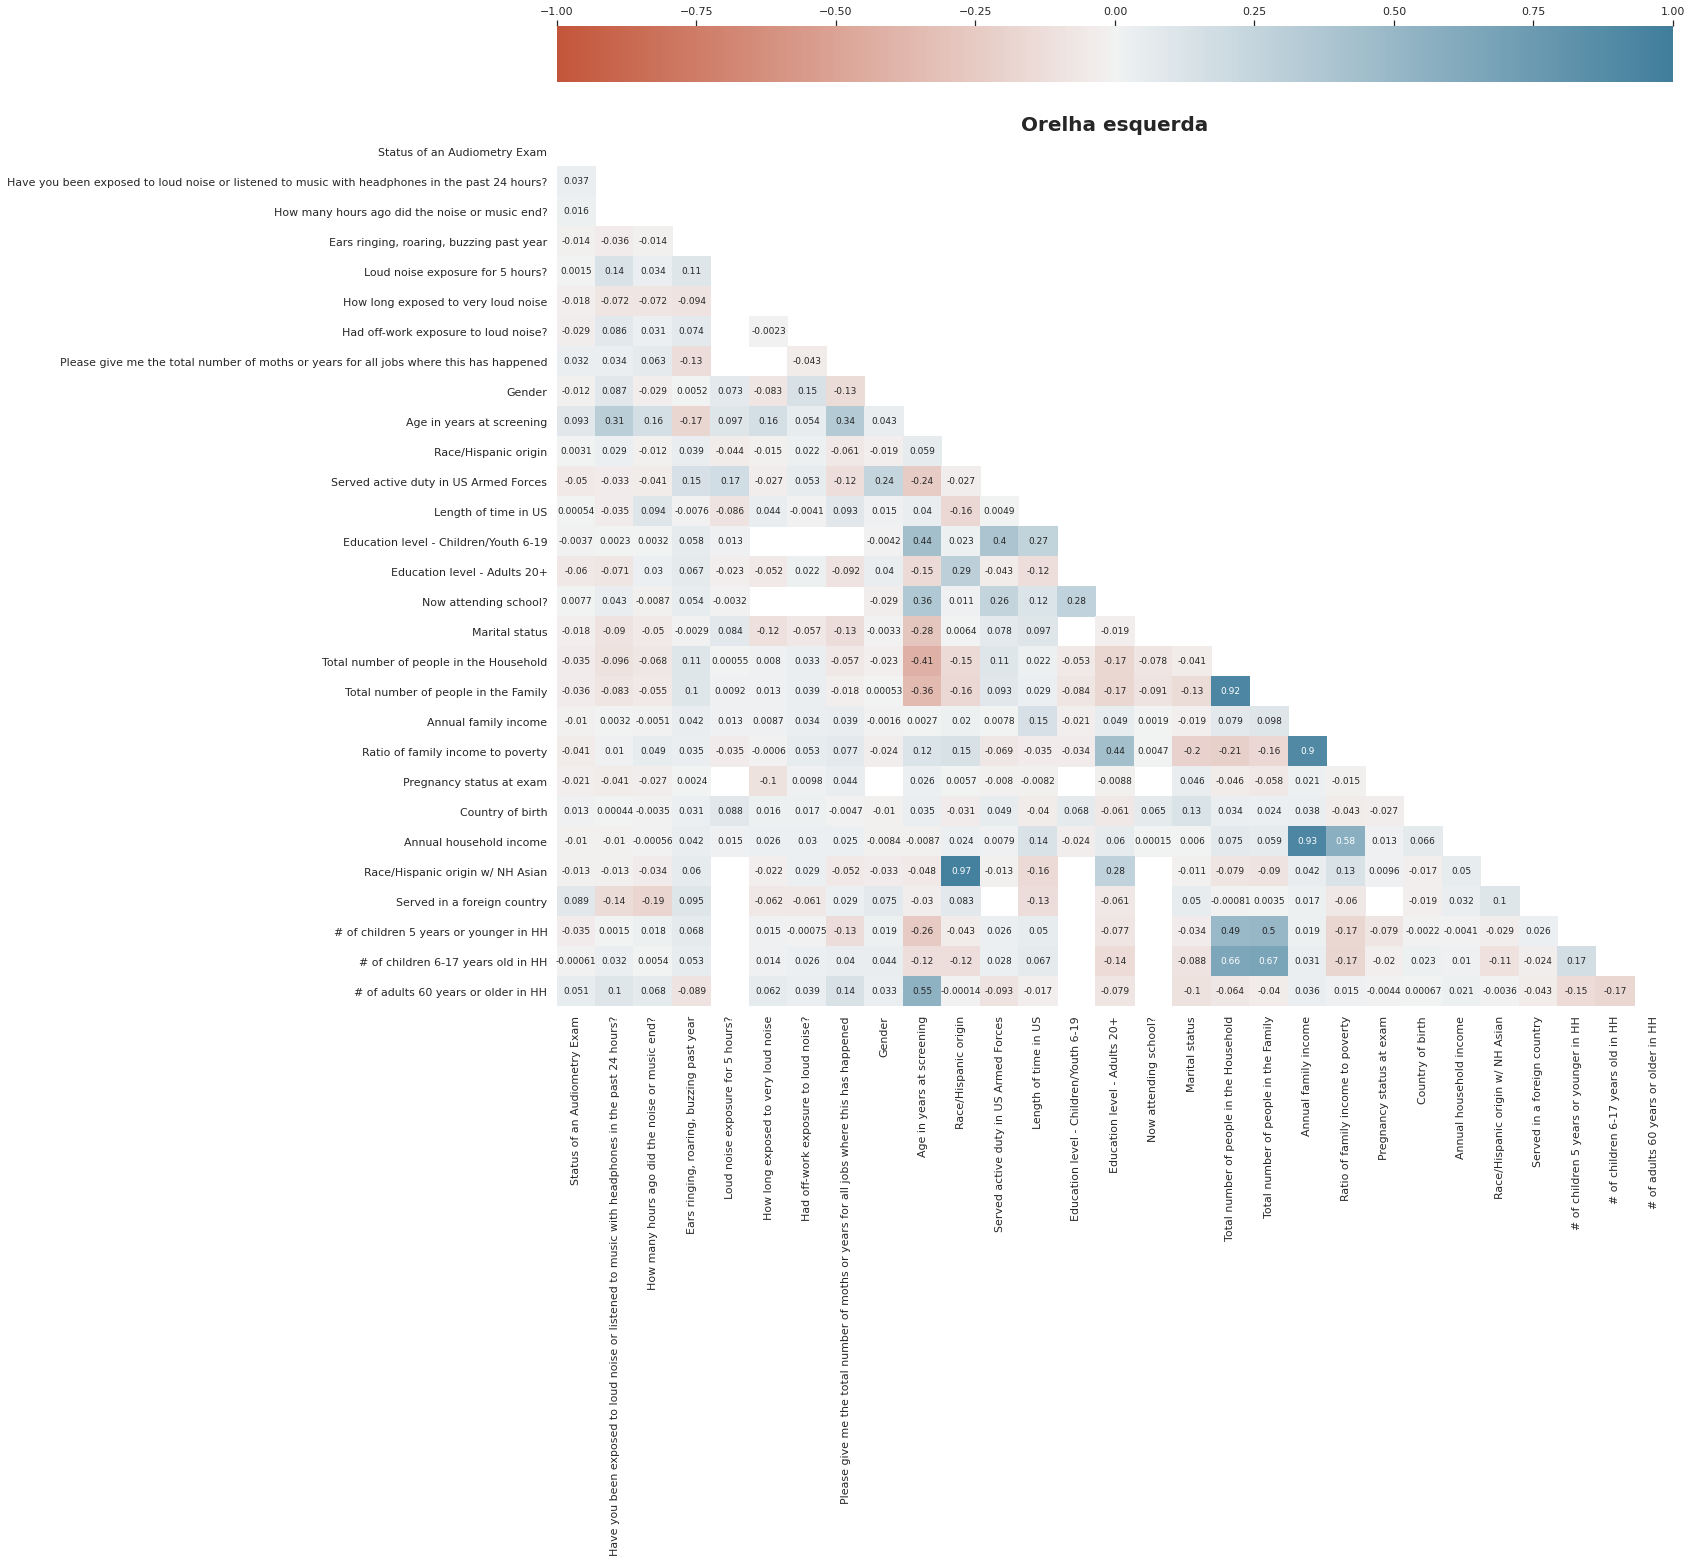

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = left_filtered.drop('SEQN', 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1);

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr,
                 mask=mask,
                 cmap=cmap,
                 norm=divnorm,
                 cbar_kws = dict(use_gridspec=False, location="top"),
                 annot=True,
                 fmt='.2',
                 annot_kws={"fontsize": 9})
ax.set_title('Orelha esquerda', fontsize = 20, fontweight='bold');

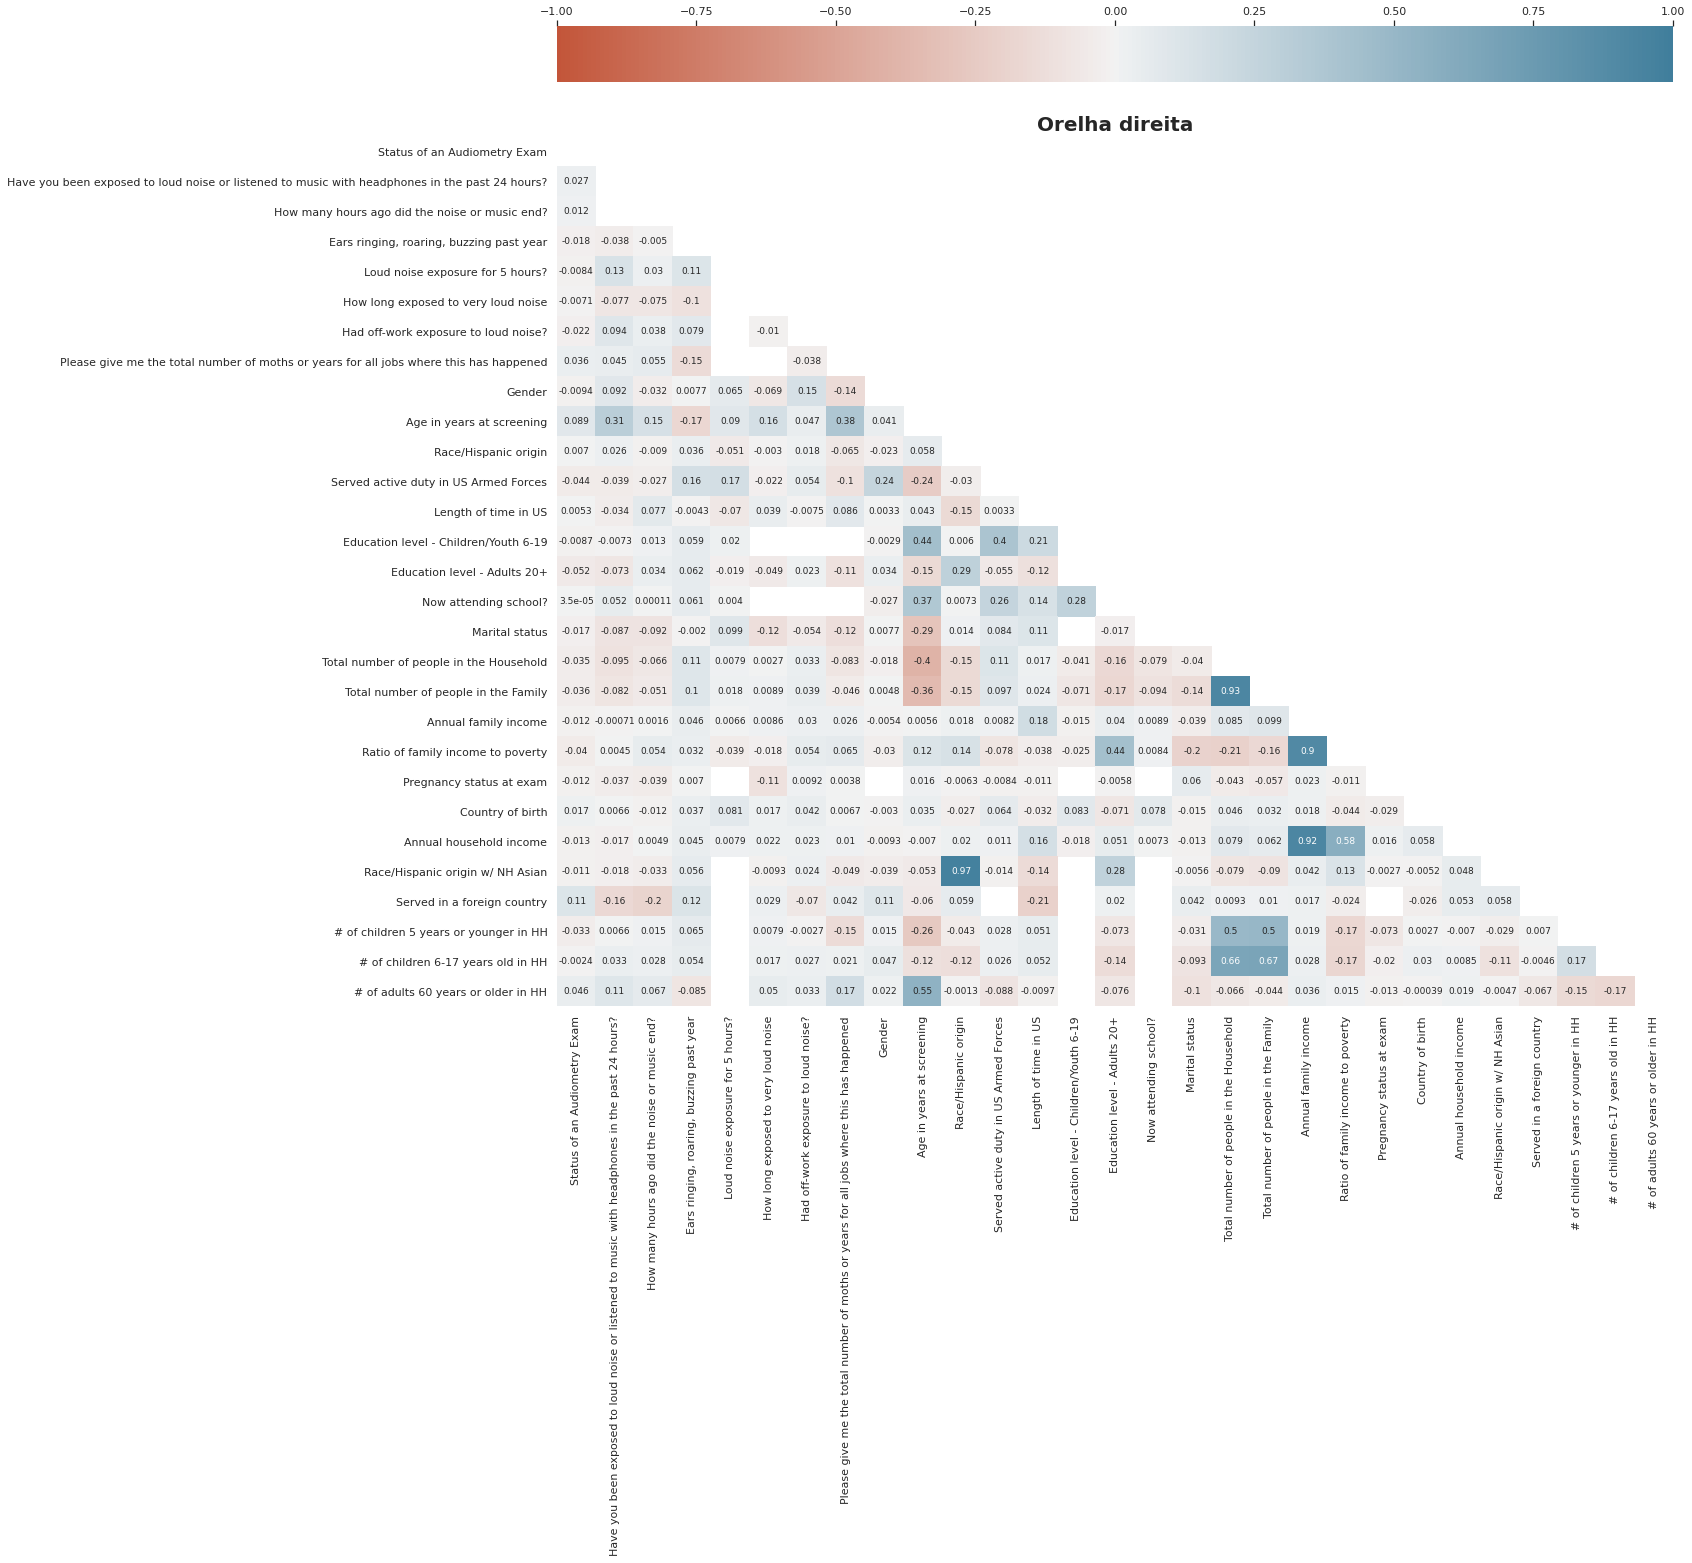

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = right_filtered.drop('SEQN', 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1);

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr,
                 mask=mask,
                 cmap=cmap,
                 norm=divnorm,
                 cbar_kws = dict(use_gridspec=False, location="top"),
                 annot=True,
                 fmt='.2',
                 annot_kws={"fontsize": 9})
ax.set_title('Orelha direita', fontsize = 20, fontweight='bold');

## Modeling data
Can we find a model to classify the severity of hearing loss?

### Left Ear

In [ ]:
left_filtered.isna().sum()

SEQN                                                                                                 0
Status of an Audiometry Exam                                                                         0
Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?       0
How many hours ago did the noise or music end?                                                    7862
Ears ringing, roaring, buzzing past year                                                             4
Loud noise exposure for 5 hours?                                                                  7005
years                                                                                                0
How long exposed to very loud noise                                                               9065
Had off-work exposure to loud noise?                                                              2780
Please give me the total number of moths or years for all jobs where this

Too many missing data. Let's filter for the columns that have less missing data.

In [ ]:
left_na = left_filtered[[# 'Status of an Audiometry Exam',
            'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
            # 'How many hours ago did the noise or music end?',
            'Ears ringing, roaring, buzzing past year',
            # 'Loud noise exposure for 5 hours?', 
            # 'years',
            # 'How long exposed to very loud noise',
            # 'Had off-work exposure to loud noise?', 
            # 'Please give me the total number of moths or years for all jobs where this has happened',
            'Gender',
            'Age in years at screening',
            'Race/Hispanic origin', 
            # 'Served active duty in US Armed Forces',
            # 'Length of time in US',
            # 'Education level - Children/Youth 6-19', 
            # 'Education level - Adults 20+',
            # 'Now attending school?', 
            # 'Marital status',
            'Total number of people in the Household',
            'Total number of people in the Family',
            'Annual family income', 
            'Ratio of family income to poverty',
            # 'Pregnancy status at exam',
            'Country of birth', 
            'Annual household income',
            'LeftHearing Loss Class'
            # 'Citizenship status', 
            # 'Race/Hispanic origin w/ NH Asian',
            # 'Served in a foreign country',
            # '# of children 5 years or younger in HH',
            # '# of children 6-17 years old in HH',
            # '# of adults 60 years or older in HH'
]]


left_na = left_na.dropna()
left_na.isna().sum()

Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?    0
Ears ringing, roaring, buzzing past year                                                          0
Gender                                                                                            0
Age in years at screening                                                                         0
Race/Hispanic origin                                                                              0
Total number of people in the Household                                                           0
Total number of people in the Family                                                              0
Annual family income                                                                              0
Ratio of family income to poverty                                                                 0
Country of birth                                                                                  0


In [ ]:
left_na['LeftHearing Loss Class'].value_counts()

Normal                     6997
Leve                       1209
Moderada                    394
Moderadamente severa        138
Severa                       54
Perda auditiva completa      41
Profunda                     22
Name: LeftHearing Loss Class, dtype: int64

Huge class imbalance.

In [ ]:
left_na.shape

(8855, 12)

In [ ]:
left_na.isna().sum()

Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?    0
Ears ringing, roaring, buzzing past year                                                          0
Gender                                                                                            0
Age in years at screening                                                                         0
Race/Hispanic origin                                                                              0
Total number of people in the Household                                                           0
Total number of people in the Family                                                              0
Annual family income                                                                              0
Ratio of family income to poverty                                                                 0
Country of birth                                                                                  0


#### Split data

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(left_na, 
                                                                            target = 'LeftHearing Loss Class', 
                                                                            train_size = 0.8,
                                                                            valid_size = 0.1, 
                                                                            test_size = 0.1)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7084, 11)
(7084,)
(885, 11)
(885,)
(886, 11)
(886,)


(None, None)

#### Decision Tree Classifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

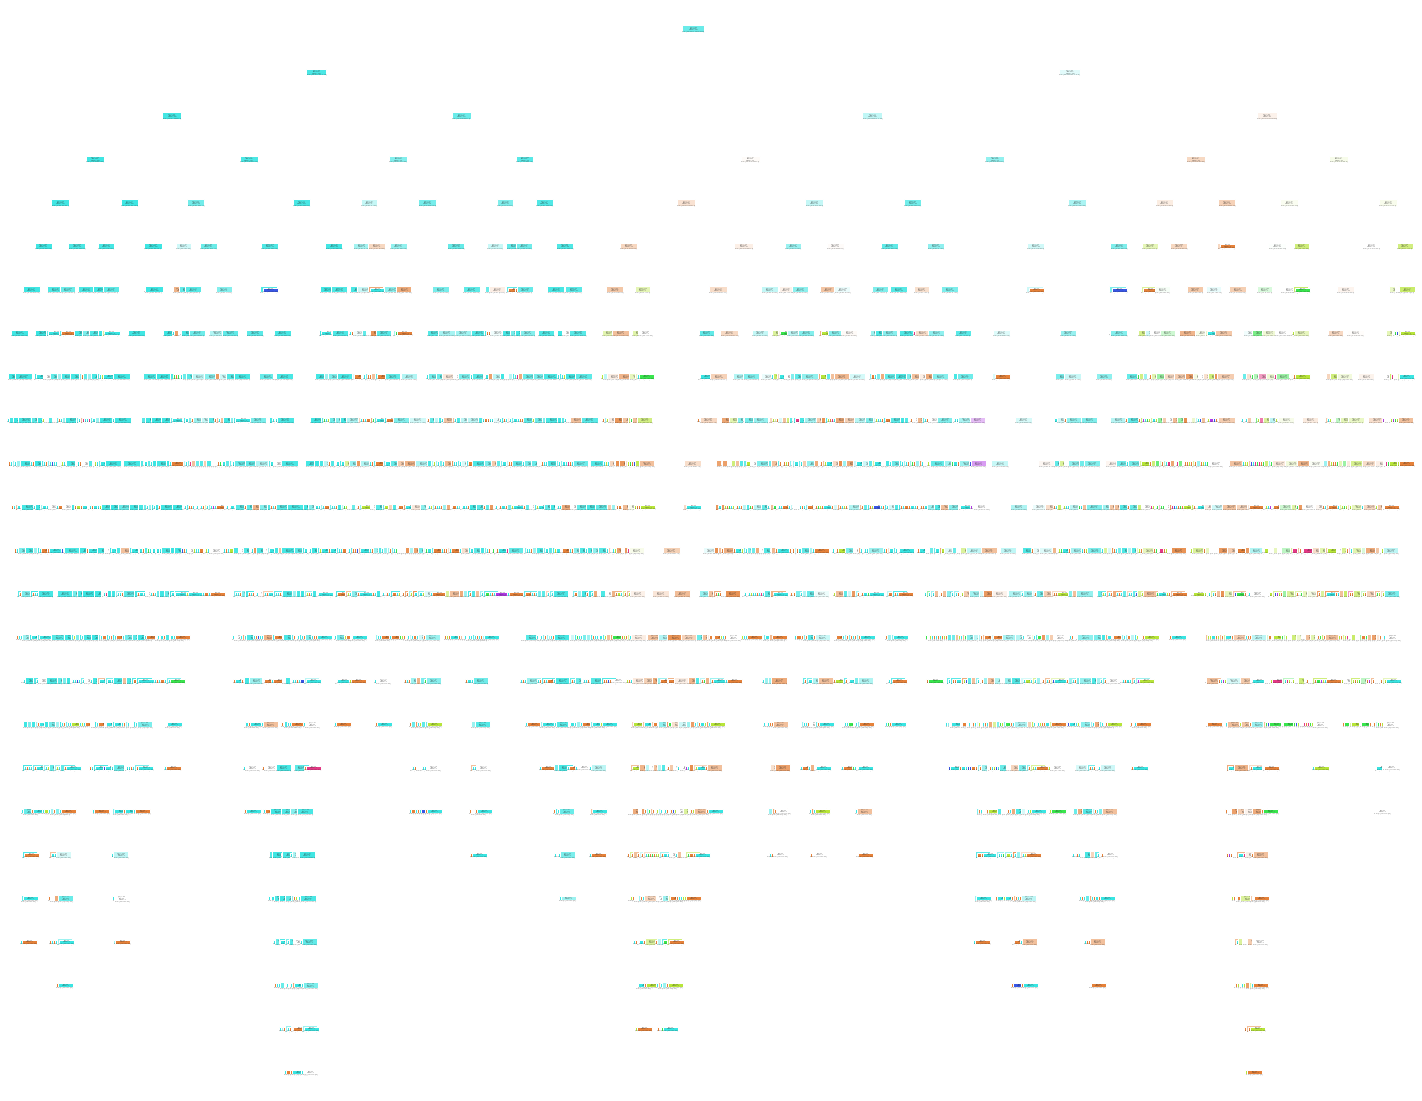

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = clf.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 36  12   3  71   4   0   2]
 [ 12  11   2  11   0   0   3]
 [  1   2   0   7   0   0   1]
 [ 82  15   4 591   4   0   1]
 [  1   0   0   2   0   0   1]
 [  0   1   0   1   0   0   0]
 [  0   1   1   1   0   0   1]]
acc =  0.7220338983050848
f1 score =  0.726799424789009


#### Random Forest

In [ ]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = clf.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 21   8   1  96   0   0   2]
 [ 18   6   2  12   0   0   1]
 [  1   1   1   8   0   0   0]
 [ 36   5   0 655   0   0   1]
 [  1   0   0   3   0   0   0]
 [  0   1   0   1   0   0   0]
 [  0   2   1   1   0   0   0]]
acc =  0.7717514124293785
f1 score =  0.7401342247251405


#### SVC

In [ ]:
# https://elitedatascience.com/imbalanced-classes

In [ ]:
clf = SVC(kernel = 'linear',
          class_weight = 'balanced',
          probability = True)
clf = clf.fit(X_train, y_train)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = clf.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 27   2  11  28  31  11  18]
 [  7   1   8   2   3  10   8]
 [  3   2   0   1   2   2   1]
 [ 88   6   4 502  61   9  27]
 [  0   1   1   1   1   0   0]
 [  0   0   0   0   1   1   0]
 [  1   0   1   0   0   2   0]]
acc =  0.6011299435028249
f1 score =  0.6750270619865681


#### Logistic Regression


In [ ]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = lr.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 27   7   4  28  32  14  16]
 [  8   5   4   2   5   7   8]
 [  4   1   1   0   3   2   0]
 [ 76  10   4 503  76  10  18]
 [  0   1   1   1   1   0   0]
 [  0   0   1   0   1   0   0]
 [  1   0   1   0   0   2   0]]
acc =  0.6067796610169491
f1 score =  0.6836184270712485


### Right Ear

In [ ]:
right_na = right_filtered[[# 'Status of an Audiometry Exam',
            'Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?',
            # 'How many hours ago did the noise or music end?',
            'Ears ringing, roaring, buzzing past year',
            # 'Loud noise exposure for 5 hours?', 
            # 'years',
            # 'How long exposed to very loud noise',
            # 'Had off-work exposure to loud noise?', 
            # 'Please give me the total number of moths or years for all jobs where this has happened',
            'Gender',
            'Age in years at screening',
            'Race/Hispanic origin', 
            # 'Served active duty in US Armed Forces',
            # 'Length of time in US',
            # 'Education level - Children/Youth 6-19', 
            # 'Education level - Adults 20+',
            # 'Now attending school?', 
            # 'Marital status',
            'Total number of people in the Household',
            'Total number of people in the Family',
            'Annual family income', 
            'Ratio of family income to poverty',
            # 'Pregnancy status at exam',
            'Country of birth', 
            'Annual household income',
            'RightHearing Loss Class'
            # 'Citizenship status', 
            # 'Race/Hispanic origin w/ NH Asian',
            # 'Served in a foreign country',
            # '# of children 5 years or younger in HH',
            # '# of children 6-17 years old in HH',
            # '# of adults 60 years or older in HH'
]]


right_na = right_na.dropna()
right_na.isna().sum()

Have you been exposed to loud noise or listened to music with headphones in the past 24 hours?    0
Ears ringing, roaring, buzzing past year                                                          0
Gender                                                                                            0
Age in years at screening                                                                         0
Race/Hispanic origin                                                                              0
Total number of people in the Household                                                           0
Total number of people in the Family                                                              0
Annual family income                                                                              0
Ratio of family income to poverty                                                                 0
Country of birth                                                                                  0


In [ ]:
right_na['RightHearing Loss Class'].value_counts()

Normal                     6982
Leve                       1164
Moderada                    366
Moderadamente severa        126
Perda auditiva completa      41
Severa                       35
Profunda                     14
Name: RightHearing Loss Class, dtype: int64

Huge class imbalance as well.

#### Split data

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(right_na, 
                                                                            target = 'RightHearing Loss Class', 
                                                                            train_size = 0.8,
                                                                            valid_size = 0.1, 
                                                                            test_size = 0.1)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(6982, 11)
(6982,)
(873, 11)
(873,)
(873, 11)
(873,)


(None, None)

#### Decision Tree Classifier

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

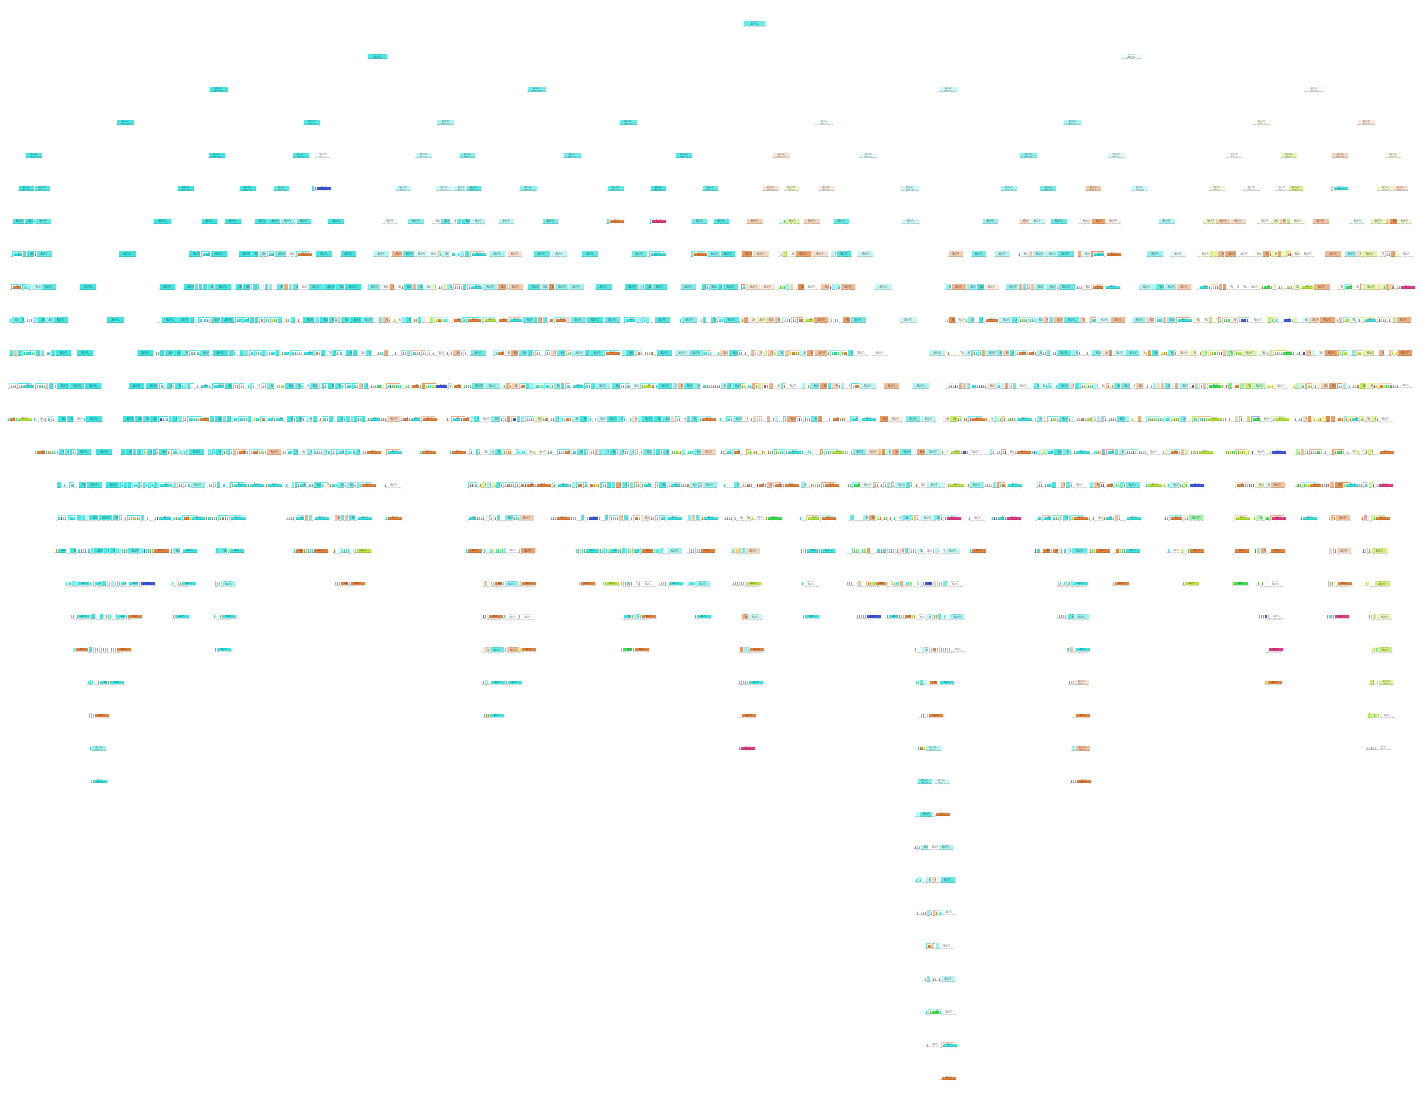

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = clf.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 44  11   6  74   2   0   0]
 [ 12   3   3  16   1   0   0]
 [  2   1   3   4   0   0   1]
 [ 57  10   7 603   1   0   0]
 [  2   0   0   2   0   0   0]
 [  0   0   0   3   0   0   0]
 [  1   1   1   2   0   0   0]]
acc =  0.7479954180985109
f1 score =  0.7382653587820668


#### Random Forest

In [ ]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = clf.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 33  11   1  92   0   0   0]
 [ 12   7   1  14   1   0   0]
 [  2   1   1   6   0   0   1]
 [ 22   4   0 652   0   0   0]
 [  1   0   0   3   0   0   0]
 [  0   0   0   3   0   0   0]
 [  2   1   0   1   1   0   0]]
acc =  0.7938144329896907
f1 score =  0.7597856590167914


#### SVC

In [ ]:
# https://elitedatascience.com/imbalanced-classes

In [ ]:
clf = SVC(kernel = 'linear',
          class_weight = 'balanced',
          probability = True)
clf = clf.fit(X_train, y_train)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = clf.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 24  13  28  25  17  16  14]
 [  5   3  11   0   5   2   9]
 [  0   0   2   1   4   2   2]
 [ 66  12   4 507  37  42  10]
 [  0   1   0   0   2   0   1]
 [  1   0   1   0   1   0   0]
 [  0   1   2   1   0   1   0]]
acc =  0.6162657502863689
f1 score =  0.6869025235959296


#### Logistic Regression


In [ ]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('\n Conjunto de Validação \n')
val_preds = lr.predict(X_valid)
CM_val = confusion_matrix(y_valid, val_preds)
print('Matriz de confusão = \n', CM_val)
print('acc = ', np.sum(y_valid == val_preds)/val_preds.size)
print('f1 score = ', f1_score(y_valid, val_preds, average = 'weighted'))


 Conjunto de Validação 

Matriz de confusão = 
 [[ 18   9  28  24  21  24  13]
 [  2   3  10   2   4   3  11]
 [  0   0   2   1   3   3   2]
 [ 53  10   6 476  59  66   8]
 [  0   0   0   0   2   0   2]
 [  0   1   1   0   1   0   0]
 [  0   0   1   1   1   1   1]]
acc =  0.5750286368843069
f1 score =  0.6578805829705906
